In [1]:
# Importing the required python libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Reading the data
df=pd.read_csv('Dataset_Uber Traffic.csv')
df.head(10)

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041
5,01/11/15 5:00,1,6,20151101051
6,01/11/15 6:00,1,9,20151101061
7,01/11/15 7:00,1,8,20151101071
8,01/11/15 8:00,1,11,20151101081
9,01/11/15 9:00,1,12,20151101091


In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
# Checking if there is any null value present in the data or not 

null_values=df.isnull().sum()
print(null_values)

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [5]:
# Checking for duplicate values

duplicates=df.duplicated().sum()
print(duplicates)

0


To normalize or standardize the data to facilitate comparison across different time periods and junctions, you can use several techniques. Two common methods are Min-Max normalization and Z-score standardization. 

# Min-Max Normalization

In [8]:
df['vehicles_min_max']=(df['Vehicles']-df['Vehicles'].min()) / (df['Vehicles'].max()-df['Vehicles'].min())

# Z-score Standardization

In [9]:
df['Vehicles_z_score'] = (df['Vehicles'] - df['Vehicles'].mean()) / df['Vehicles'].std()

df[['DateTime', 'Junction', 'Vehicles', 'Vehicles_z_score']]

,DateTime,Junction,Vehicles,Vehicles_z_score
0,01/11/15 0:00,1,15,-0.375485
1,01/11/15 1:00,1,13,-0.471870
2,01/11/15 2:00,1,10,-0.616448
3,01/11/15 3:00,1,7,-0.761026
4,01/11/15 4:00,1,9,-0.664641
...,...,...,...,...
48115,30/06/17 19:00,4,11,-0.568255
48116,30/06/17 20:00,4,30,0.347405
48117,30/06/17 21:00,4,16,-0.327292
48118,30/06/17 22:00,4,22,-0.038136


# Time-based features

To generate time-based features such as hour of the day, day of the week, and month from a datetime column in a Pandas DataFrame, you can use the "dt" accessor provided by Pandas for datetime operations. 

In [ ]:

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Generate time-based features such as Hour of day, day of week, month
df['Hour_of_day'] = df['DateTime'].dt.hour
df['Day_of_week'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['DateTime'].dt.month

df.head(10)

# Lag Feature

Developing lag features in your dataset using traffic data from previous hours or days, you can create new columns that shift existing columns by a specified number of time units (hours or days). This allows you to capture temporal dependencies in your data, which can be useful for time series forecasting or predictive modeling tasks. Here’s how to do this using Python and Pandas:

In [11]:
df['DateTime']=pd.to_datetime(df['DateTime'])
hours_to_shift=1

df['Vehicles_lag_1hour']=df.groupby('Junction')['Vehicles'].shift(hours_to_shift)
df.head(10)

,DateTime,Junction,Vehicles,ID,vehicles_min_max,Vehicles_z_score,Hour_of_day,Day_of_week,Month,Vehicles_lag_1hour
0,2015-01-11 00:00:00,1,15,20151101001,0.078212,-0.375485,0,6,1,NaN
1,2015-01-11 01:00:00,1,13,20151101011,0.067039,-0.471870,1,6,1,15.0
2,2015-01-11 02:00:00,1,10,20151101021,0.050279,-0.616448,2,6,1,13.0
3,2015-01-11 03:00:00,1,7,20151101031,0.033520,-0.761026,3,6,1,10.0
4,2015-01-11 04:00:00,1,9,20151101041,0.044693,-0.664641,4,6,1,7.0
5,2015-01-11 05:00:00,1,6,20151101051,0.027933,-0.809218,5,6,1,9.0
6,2015-01-11 06:00:00,1,9,20151101061,0.044693,-0.664641,6,6,1,6.0
7,2015-01-11 07:00:00,1,8,20151101071,0.039106,-0.712833,7,6,1,9.0
8,2015-01-11 08:00:00,1,11,20151101081,0.055866,-0.568255,8,6,1,8.0
9,2015-01-11 09:00:00,1,12,20151101091,0.061453,-0.520063,9,6,1,11.0


# Binary Indicators

Creating Binary Indicators helps to provide a systematic way to incorporate temporal and event-specific variations into your dataset, enhancing the robustness of the model 

Below there are 2 binary indicators i.e. "is_weekend" and "is_special_event"

In [12]:
# Binary Indicators for weekends, and special events

df['is_weekend'] = df['DateTime'].dt.dayofweek>=5

special_event_dates=['2023-06-01']

special_event_dates = pd.to_datetime(special_event_dates)

df['is_special_event']=df['DateTime'].dt.date.isin(special_event_dates.date)

df.head(10)

,DateTime,Junction,Vehicles,ID,vehicles_min_max,Vehicles_z_score,Hour_of_day,Day_of_week,Month,Vehicles_lag_1hour,is_weekend,is_special_event
0,2015-01-11 00:00:00,1,15,20151101001,0.078212,-0.375485,0,6,1,NaN,True,False
1,2015-01-11 01:00:00,1,13,20151101011,0.067039,-0.471870,1,6,1,15.0,True,False
2,2015-01-11 02:00:00,1,10,20151101021,0.050279,-0.616448,2,6,1,13.0,True,False
3,2015-01-11 03:00:00,1,7,20151101031,0.033520,-0.761026,3,6,1,10.0,True,False
4,2015-01-11 04:00:00,1,9,20151101041,0.044693,-0.664641,4,6,1,7.0,True,False
5,2015-01-11 05:00:00,1,6,20151101051,0.027933,-0.809218,5,6,1,9.0,True,False
6,2015-01-11 06:00:00,1,9,20151101061,0.044693,-0.664641,6,6,1,6.0,True,False
7,2015-01-11 07:00:00,1,8,20151101071,0.039106,-0.712833,7,6,1,9.0,True,False
8,2015-01-11 08:00:00,1,11,20151101081,0.055866,-0.568255,8,6,1,8.0,True,False
9,2015-01-11 09:00:00,1,12,20151101091,0.061453,-0.520063,9,6,1,11.0,True,False


# Correlation Analysis

Calculating the correlation between features and the target variable to get an initial idea of feature relevance.

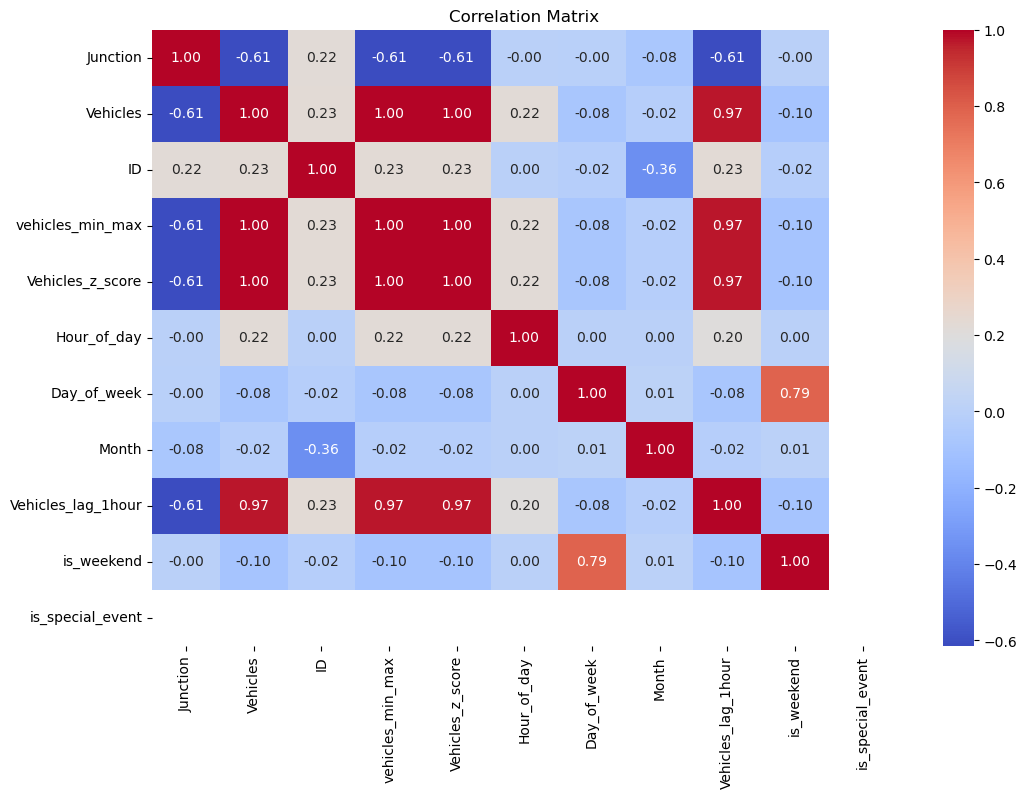

vehicles_min_max      1.000000
Vehicles              1.000000
Vehicles_z_score      1.000000
Vehicles_lag_1hour    0.970143
ID                    0.227974
Hour_of_day           0.219938
Month                -0.016758
Day_of_week          -0.084059
is_weekend           -0.096628
Junction             -0.613787
is_special_event           NaN
Name: Vehicles, dtype: float64


In [13]:
# Correlation analysis

correlation_matrix=df.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_with_target = correlation_matrix['Vehicles'].sort_values(ascending=False)
print(correlation_with_target)

In [14]:
# Dropping the Null values from the data

df.dropna(inplace=True)

df.isnull().sum()

DateTime              0
Junction              0
Vehicles              0
ID                    0
vehicles_min_max      0
Vehicles_z_score      0
Hour_of_day           0
Day_of_week           0
Month                 0
Vehicles_lag_1hour    0
is_weekend            0
is_special_event      0
dtype: int64

# Feature Importance from Tree-Based Models:

Using tree-based models like Random Forest to compute feature importance scores.

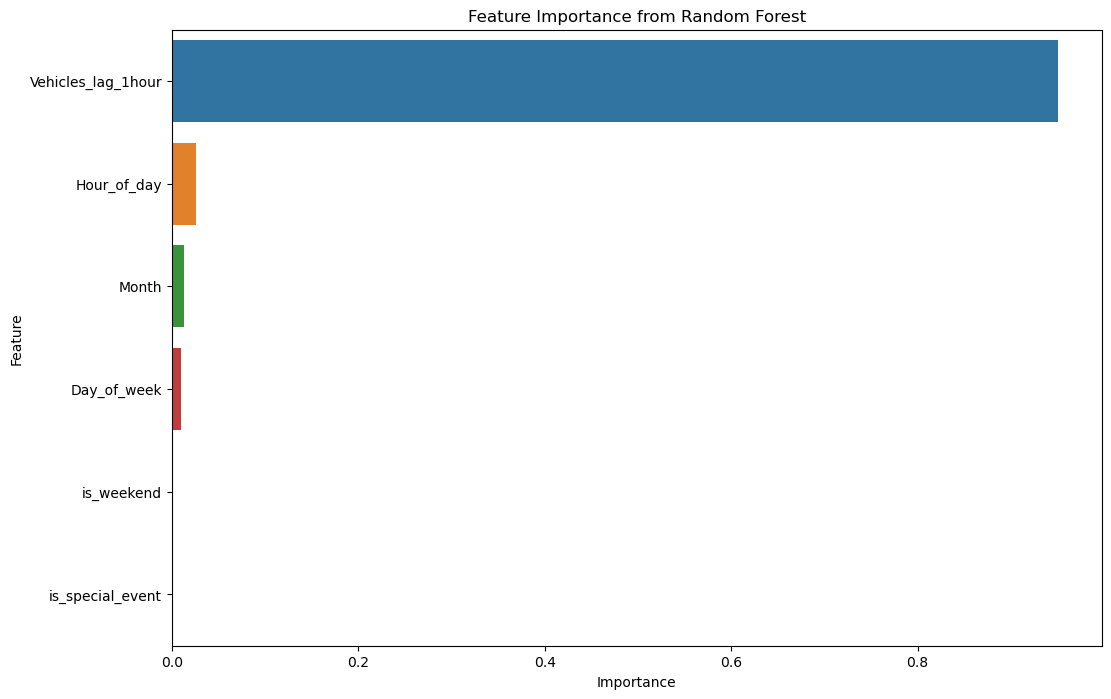

In [16]:
# Feature Importance using Random Forest Regressor

features=['Hour_of_day', 'Day_of_week', 'Month', 'is_weekend', 'is_special_event', 'Vehicles_lag_1hour']
X=df[features]
Y=df['Vehicles']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df=pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Finding the most influential feature for model training

In [17]:
threshold=0.1

selected_features=feature_importance_df[feature_importance_df['Importance']>threshold]['Feature'].tolist()

print(f"Selected features: {selected_features}")

Selected features: ['Vehicles_lag_1hour']


# Selection of most influential feature:

Using the the feature importances derived from the Random Forest model to select the most influential features for model training, 

In [18]:
X_selected=X[selected_features]

X_train_selected, X_test_selected, Y_train, Y_test=train_test_split(X_selected, Y, test_size=0.3, random_state=42)

rf_model_selected=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, Y_train)

train_score=rf_model_selected.score(X_train_selected, Y_train)
test_score=rf_model_selected.score(X_test_selected, Y_test)

print(f"Train score with selected features: {train_score}")
print(f"Test score with selected features: {test_score}")

Train score with selected features: 0.9426855388389518
Test score with selected features: 0.9423781338789269
